# Happiness & Alcohol Consumption

Is alcohol consumption related to a person's happiness? Data from countries across the world is analyzed to find if there is a relationship between happiness and consumption of different types of alcohol.

<a id='index'></a>

### Contents

1. [Importing libraries](#il)
2. [Loading Dataset](#ld)
3. [Data Dictionary](#dd)
4. [Basics](#b)
5. [EDA and Visualizations](#EDA)

<a id='il'></a>
### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from wordcloud import WordCloud

import warnings;
warnings.filterwarnings('ignore')

<a id='ld'></a>
### 2. Loading dataset

In [2]:
df = pd.read_csv(r"G:\EDA - Kaggle\Happiness and Alcohol Consumption.csv")
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


<a id='dd'></a>
### 3. Data Dictionary

1. **Country** - Name of the Country
2. **Region** - Region the Country belongs to
3. **Hemisphere** - hemisphere of the Country
4. **Happiness Score** - A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of (1-10)
5. **HDI** - Human Development Index by United Nations Development Programme
6. **GDP_PerCapita** - Gross Domestic Product index
7. **Beer_PerCapita** - Liters (per capita) of beer consumption
8. **Spirit_PerCapita** - Consumption of spirits drink (per capita)
9. **Wine_PerCapita** - Wine consumption 

<a id='b'></a>
### 4. Basics - null/ duplicate values, cleaning

In [3]:
# checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [4]:
print(df.isnull().sum())
print('\n')
print(df.duplicated().any())

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64


False


* There are no null or duplicate values present in our dataset.

In [5]:
# converting columns from upper to lowercase
df = df.rename(columns = dict(zip(df.columns, [c.lower() for c in df.columns])))

In [6]:
# unique values for hemisphere
df.hemisphere.unique()

# changing 'noth' to 'north'
df.loc[df.hemisphere == 'noth', 'hemisphere'] = 'north'

<a id='EDA'></a>
### 5. Exploratory Data Analysis

#### 1. List of countireis grouped by region.

In [43]:
grouped_region = df.groupby(['region']).sum()

# highlighting max and min values for each attribute
grouped_region.style\
      .highlight_max(color = 'lightgreen')\
      .highlight_min(color = 'coral')

,happinessscore,hdi,gdp_percapita,beer_percapita,spirit_percapita,wine_percapita
region,,,,,,
Australia and New Zealand,14.647000,1853,90.229000,464,151,387
Central and Eastern Europe,145.353000,21457,230.802000,4592,4638,2263
Eastern Asia,21.908000,3298,77.888000,373,599,41
Latin America and Caribbean,139.403000,16746,912.041000,3668,2528,823
Middle East and Northern Africa,59.881000,8364,192.980000,273,455,114
North America,14.508000,1844,99.938000,489,280,184
Southeastern Asia,27.460000,3639,67.614000,398,523,15
Sub-Saharan Africa,116.241000,15019,8569.935000,2197,581,342
Western Europe,134.628000,18167,919.479000,4329,2030,3956


##### Conclusoions :
1. Happiness_score and HDI is highest in Central and Eastern Europe while North America has the lowest score in these attributes.
2. From the above table we can see that Sub-Saharan Africa has the highest gdp_percapita. This might be because majority of the countries in our dataset belongs to this region. 

In [44]:
df.region.value_counts()

Sub-Saharan Africa                 28
Central and Eastern Europe         27
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    11
Southeastern Asia                   5
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: region, dtype: int64

In [114]:
df.loc[(df.region == 'North America')]

,country,region,hemisphere,happinessscore,hdi,gdp_percapita,beer_percapita,spirit_percapita,wine_percapita
5,Canada,North America,north,7.404,922,42.349,240,122,100
12,United States,North America,north,7.104,922,57.589,249,158,84


* We have only 2 countries of North American region. 
* Clearly our dataset is not evenly distributed. Anyway we'll continue with this as we don't have any other option.

#### 2. Checking the Happiness Score of different Regions

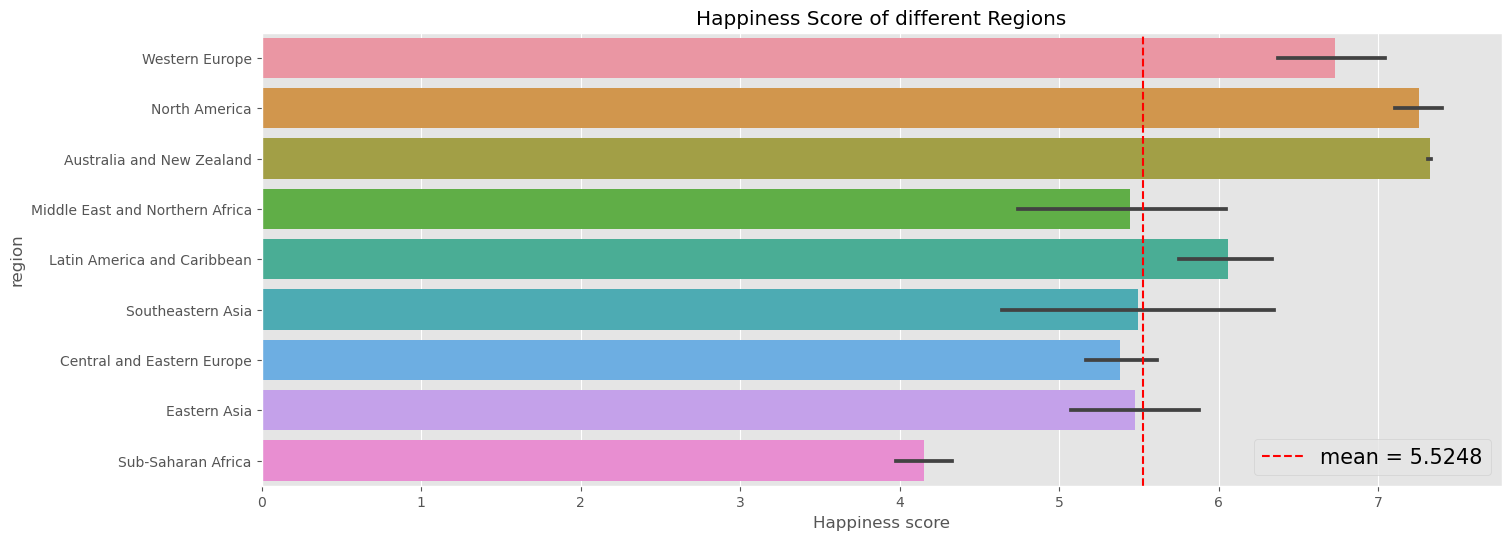

In [282]:
import matplotlib.patches as mpatches

# plotting
fig, ax = plt.subplots(figsize = (16,6), dpi = 100)
ax = sns.barplot(x = 'happinessscore', 
                 y = 'region', 
                 data = df)
# plotting mean
happiness_mean = round(df.happinessscore.mean(), 4) 
plt.axvline(df.happinessscore.mean(), 
            color = 'r', 
            linestyle = 'dashed', 
            label = "mean = " + str(happiness_mean))

# labelling
plt.legend(fontsize = 15)
plt.xlabel('Happiness score')
plt.title('Happiness Score of different Regions')
plt.show()

* Australians, New Zealanders and North Americans are the happiest people, while Sub-Saharan Africans along with Central and Eastern Europeans are the least happy people.

#### 3. From Happiest to least happy

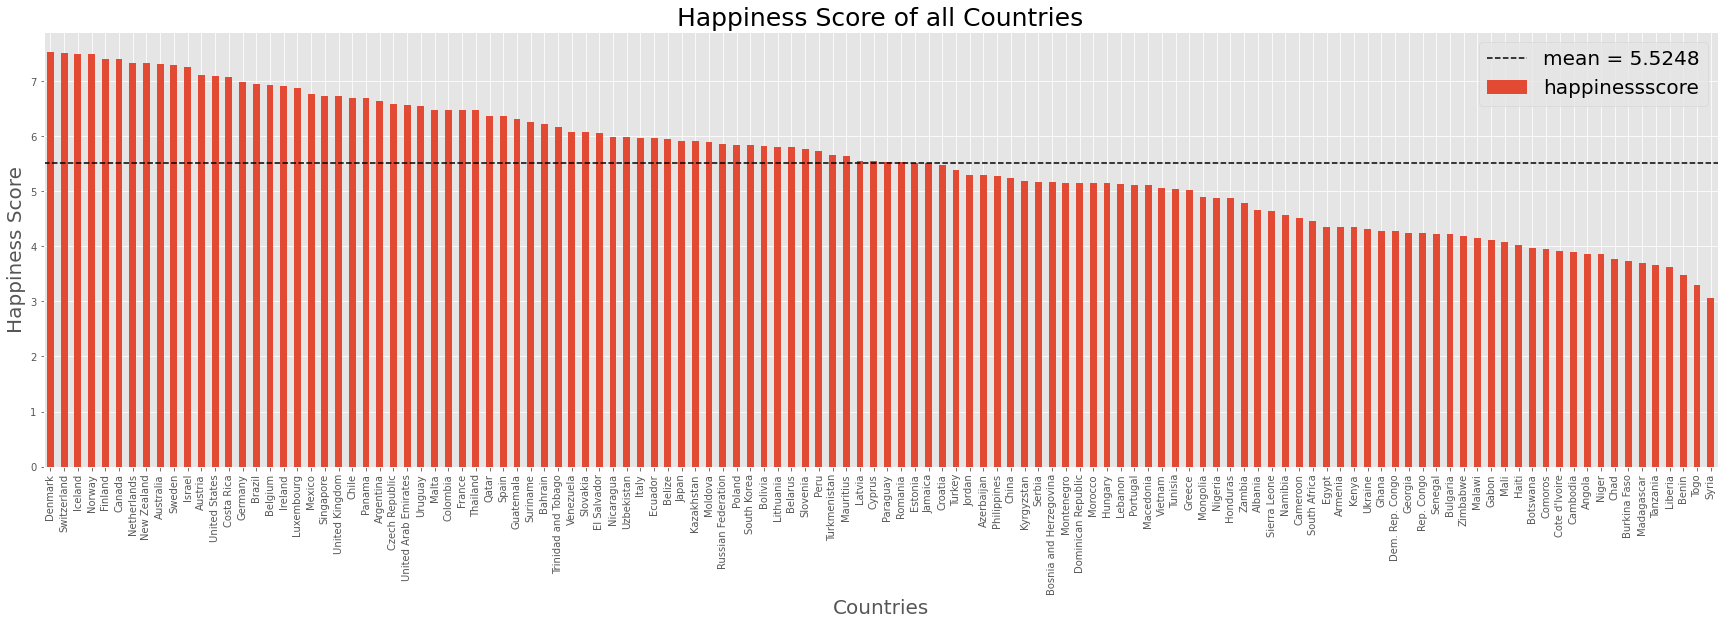

In [288]:
# plt.figure(figsize = (30,8), dpi = 100)
df.plot(x = 'country',
        y = 'happinessscore',
        kind = 'bar',
        figsize = (30,8))

# plotting mean
happiness_mean = round(df.happinessscore.mean(), 4) 
plt.axhline(df.happinessscore.mean(), 
            color = 'k', 
            linestyle = 'dashed', 
            label = "mean = " + str(happiness_mean))

plt.legend(fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Happiness Score', fontsize = 20)
plt.title('Happiness Score of all Countries', fontsize = 25)
plt.show()

#### 4. Top 20 happiest Countries

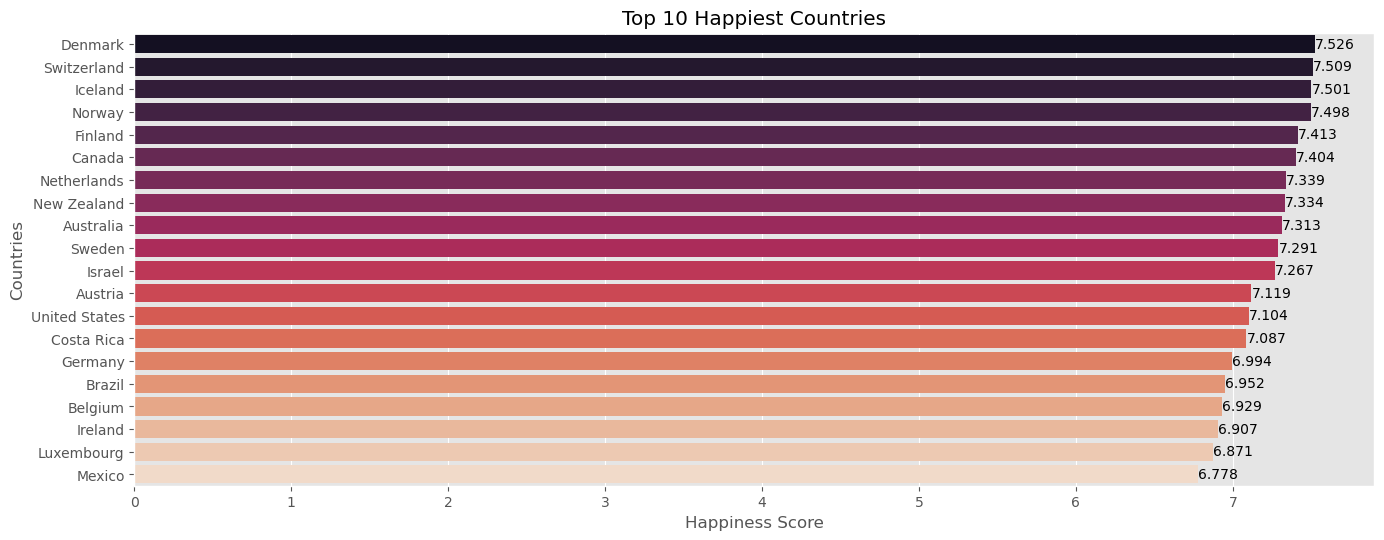

In [141]:
fig, ax2 = plt.subplots(figsize = (16,6), dpi = 100)
ax2 = sns.barplot(x = 'happinessscore', 
                  y = 'country',
                  data = df.nlargest(20, 'happinessscore'),
                  palette = 'rocket')

# labelling bar values
for values in ax2.containers:
    ax2.bar_label(values)

plt.xlabel('Happiness Score')
plt.ylabel('Countries')
plt.title('Top 10 Happiest Countries')
plt.show()

#### Conclusions :
1. Denmark is the happiest Country according to our dataset. 
2. It can be seen that majority of the countries are either European or North American.
3. Also there are no African Countries in this list. 

#### 5. Least happy Countries

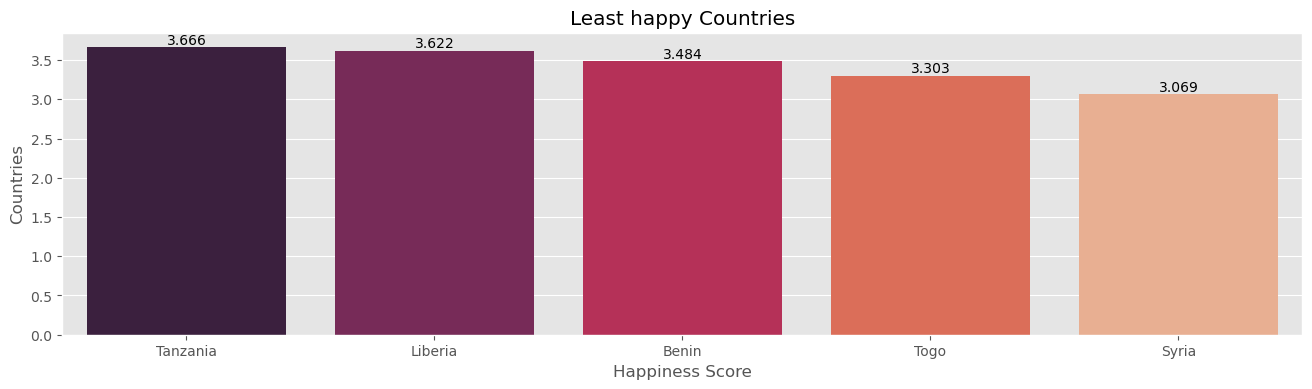

In [204]:
least_happy = df.sort_values(by = ['happinessscore'], ascending = False).tail(5)

fig, ax3 = plt.subplots(figsize = (16,4), dpi = 100)
ax2 = sns.barplot(x = 'country', 
                  y = 'happinessscore',
                  data = least_happy,
                  palette = 'rocket')

# labelling bar values
for values in ax3.containers:
    ax3.bar_label(values)

plt.xlabel('Happiness Score')
plt.ylabel('Countries')
plt.title('Least happy Countries')
plt.show()

* Syria seems to be the least happy country according to our dataset.

#### 6. Analysing Happiness_Score with respect to GDP_per_capita

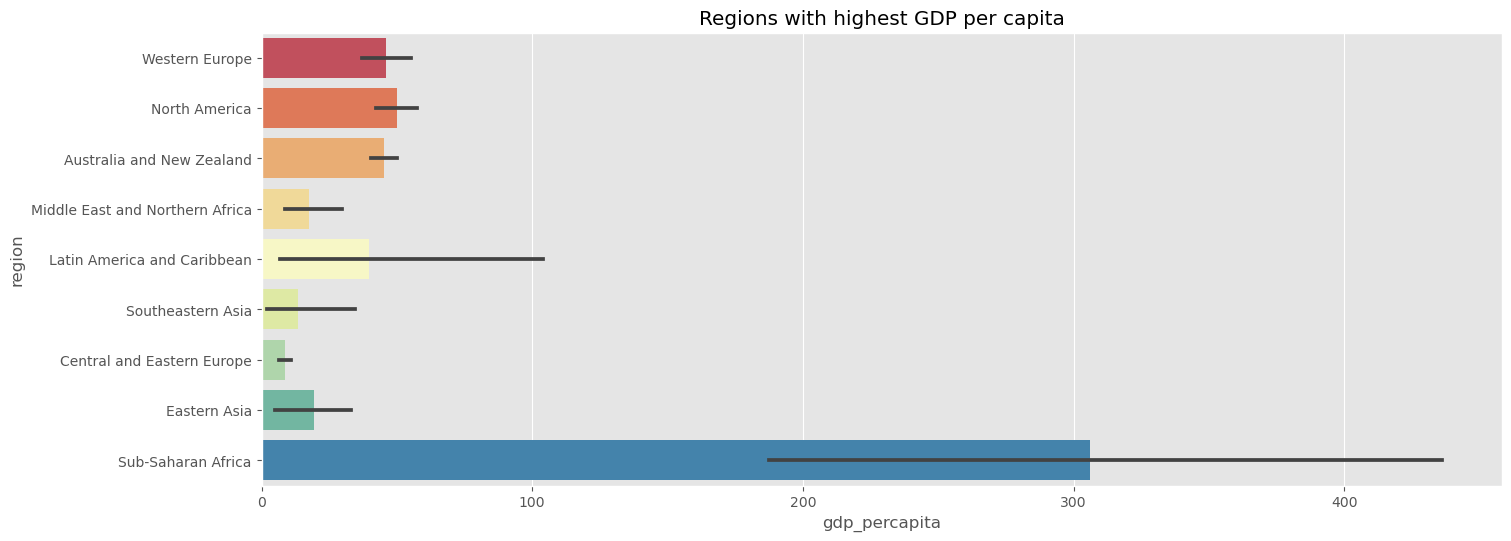

In [164]:
# plotting
plt.figure(figsize = (16,6), dpi = 100)
sns.barplot(x = 'gdp_percapita',
            y = 'region',
            data = df,
            palette = 'Spectral')
plt.title('Regions with highest GDP per capita')
plt.show()

##### Important : 
There is something wrong with the GDP_per_capita column. 
It is not possible that African Countries have a higher GDP_per_capita than European and North American Countries.

* Therefore it makes no sense to look too much into the GDP Per Capita variable.

#### 7. Countries with high HDI (Human Development Index) - 
The HDI is a summary measure of human development. How is it defined? The HDI is a summary composite measure of a country's average achievements in three basic aspects of human development: health, knowledge and standard of living.

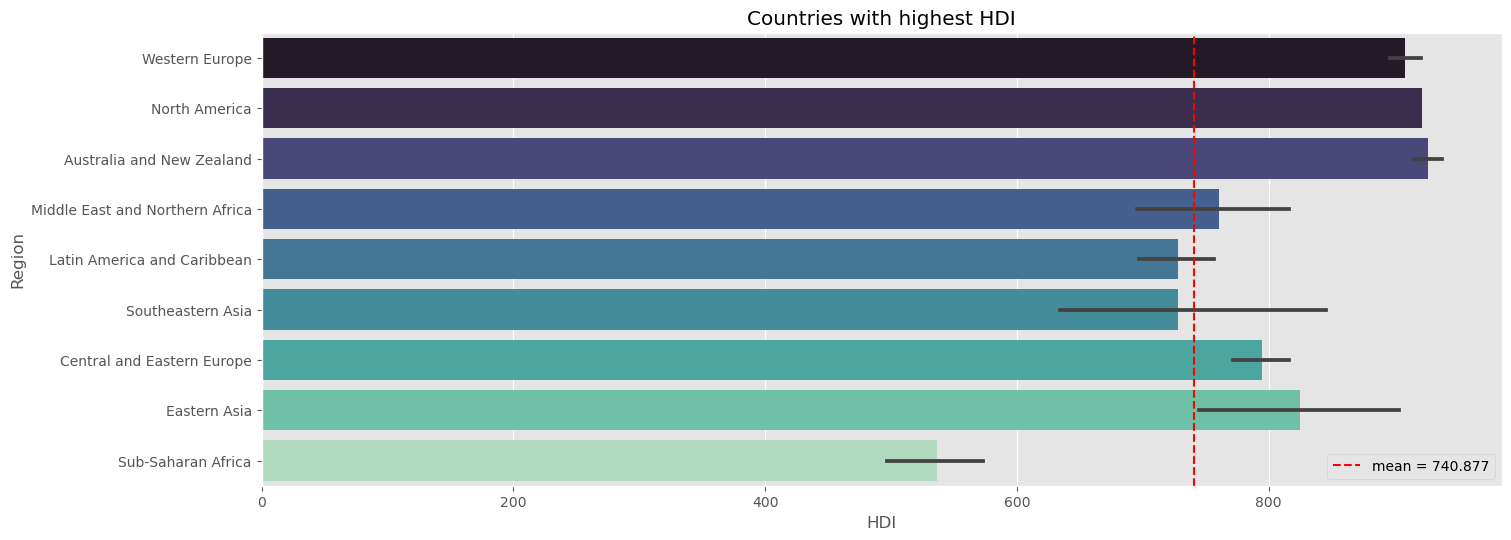

In [294]:
plt.figure(figsize = (16,6), dpi = 100)
sns.barplot(x = 'hdi',
            y = 'region',
            data = df,
            palette = 'mako')

# plotting mean
hdi_mean = round(df.hdi.mean(), 4) 
plt.axvline(df.hdi.mean(), 
            color = 'r', 
            linestyle = 'dashed', 
            label = "mean = " + str(hdi_mean))

plt.legend(fontsize = 10)
plt.xlabel('HDI')
plt.ylabel('Region')
plt.title('Countries with highest HDI')
plt.show()

- This plot is very similar to the Happiness Score plot that we saw earlier with Western Europe being at the top and Sub-Saharan Africa at bottom.

##### Lets bifurcate regions into countries now.

#### 8. Countries with highest HDI 

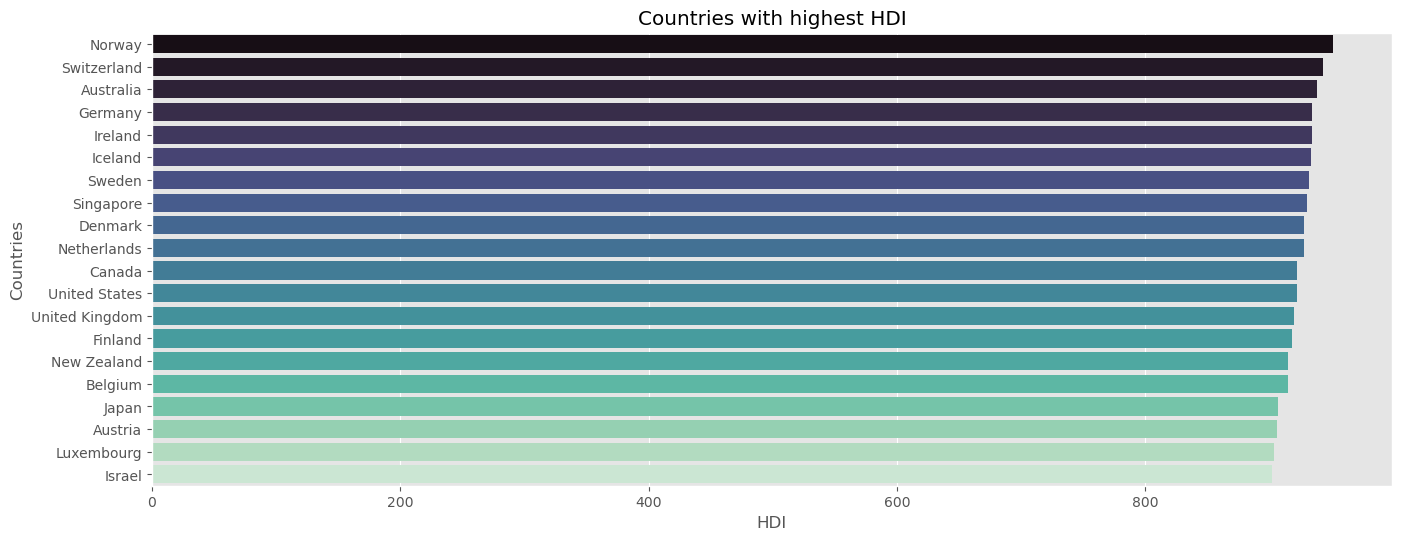

In [203]:
plt.figure(figsize = (16,6), dpi = 100)
sns.barplot(x = 'hdi',
            y = 'country',
            data = df.nlargest(20, 'hdi'),
            palette = 'mako')
plt.xlabel('HDI')
plt.ylabel('Countries')
plt.title('Countries with highest HDI')
plt.show()

#### 9. Countries with lowest HDI

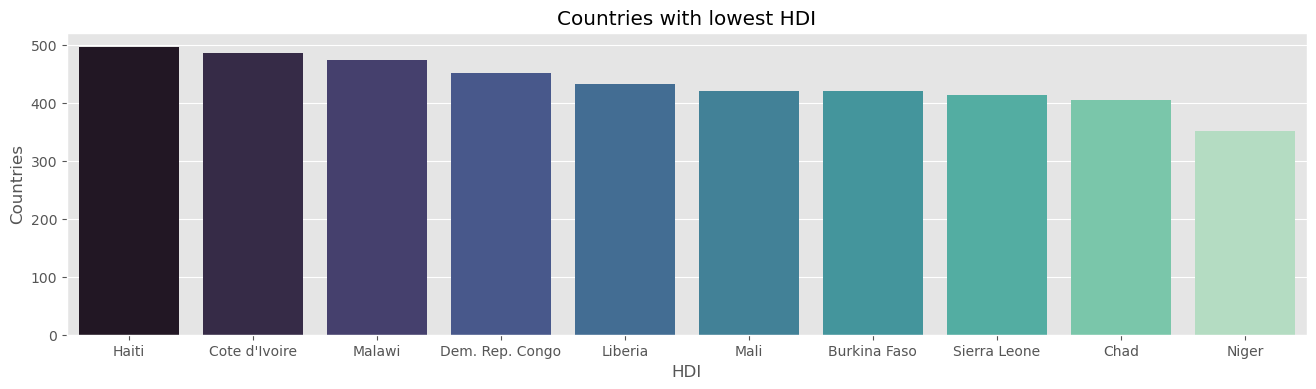

In [207]:
lowest_HDI = df.sort_values(by = ['hdi'], ascending = False).tail(10)

# plotting
plt.figure(figsize = (16,4), dpi = 100)
sns.barplot(x = 'country', 
            y = 'hdi',
            data = lowest_HDI,
            palette = 'mako')

plt.xlabel('HDI')
plt.ylabel('Countries')
plt.title('Countries with lowest HDI')
plt.show()

##### Conclusions :
1. Norway sits at the top of the list. 
2. There are no South American or African Countries in the the top 20.
3. Niger sits at the bottom. Norway is almost 3 times the Niger value.

#### 10. Beer per capita by Region

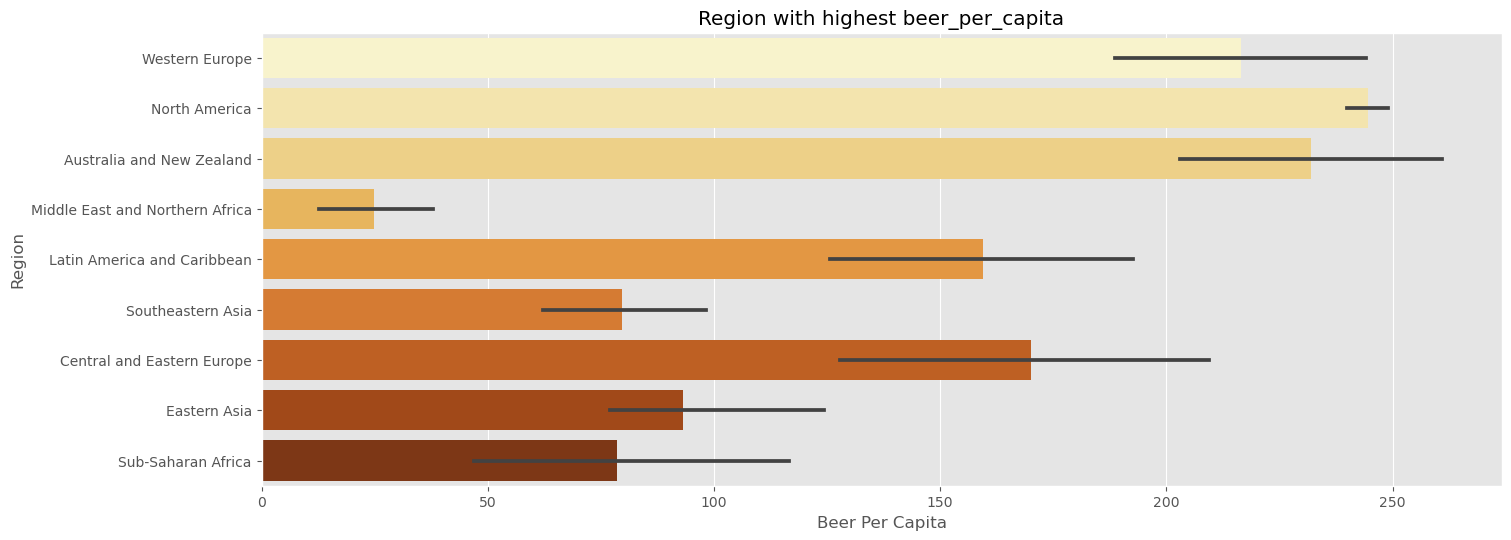

In [240]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'beer_percapita',
            y = 'region',
            data = df,
            palette = 'YlOrBr')
plt.xlabel('Beer Per Capita')
plt.ylabel('Region')
plt.title('Region with highest beer_per_capita')
plt.show()

* North America, Australia and New Zealand are yet again at the top for this category too. There is a fairly big drop in rest of the regions for this category. Middle East and Northern Africa have the least consumption of Beer.

#### 11. Beer consumption by different Countries

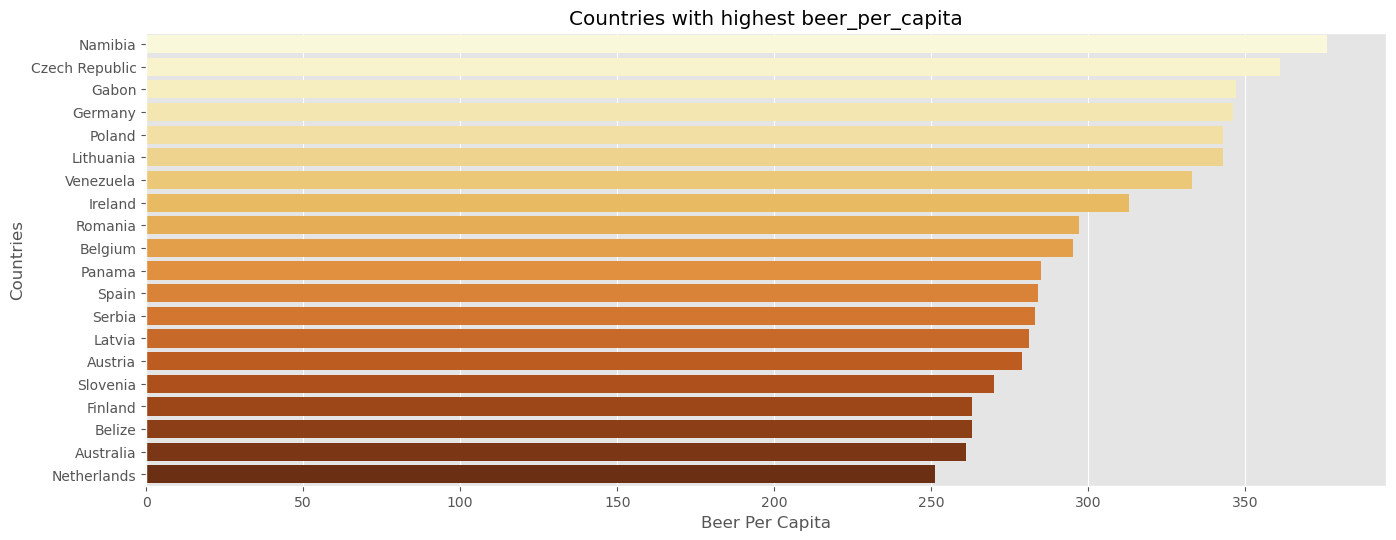

In [239]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'beer_percapita',
            y = 'country',
            data = df.nlargest(20, 'beer_percapita'),
            palette = 'YlOrBr')
plt.xlabel('Beer Per Capita')
plt.ylabel('Countries')
plt.title('Countries with highest beer_per_capita')
plt.show()

##### Important :-
* Again this is showing wrong information. The country that drinks the most beer per capita is the Czech Republic. It has topped the list for almost 30 years straight, since 1993. The Czechs drink on average 181.7L of beer per year per person.

#### 12. Countries with lowest Beer_per_capita

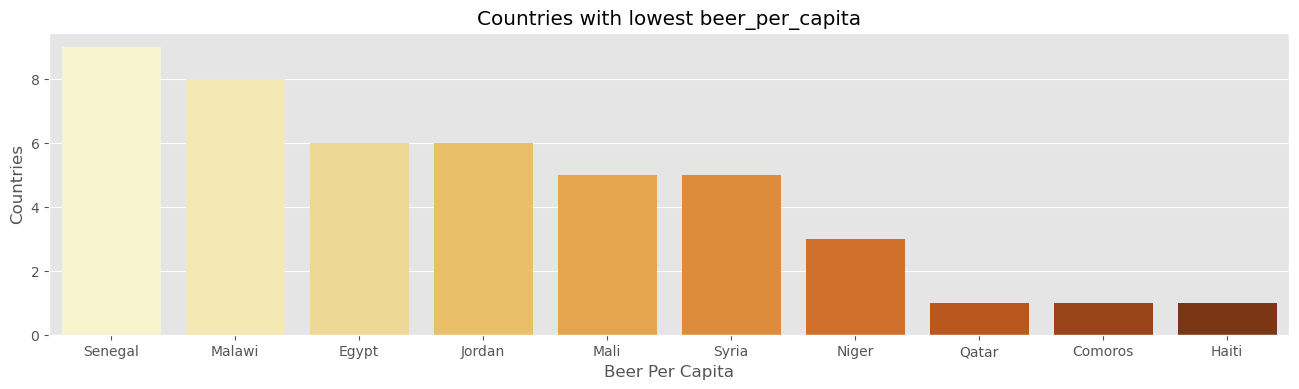

In [238]:
lowest_beer = df.sort_values(by = ['beer_percapita'], ascending = False).tail(10)

# plotting
plt.figure(figsize=(16,4), dpi = 100)

sns.barplot(x = 'country',
            y = 'beer_percapita',
            data = lowest_beer,
            palette = 'YlOrBr')
plt.xlabel('Beer Per Capita')
plt.ylabel('Countries')
plt.title('Countries with lowest beer_per_capita')
plt.show()

* Qatar, Haiti and Comoros have the lowest beer_per_capita. Most of the countries here belongs to the Middle East region.

#### 14. Spirit per capita in different Regions

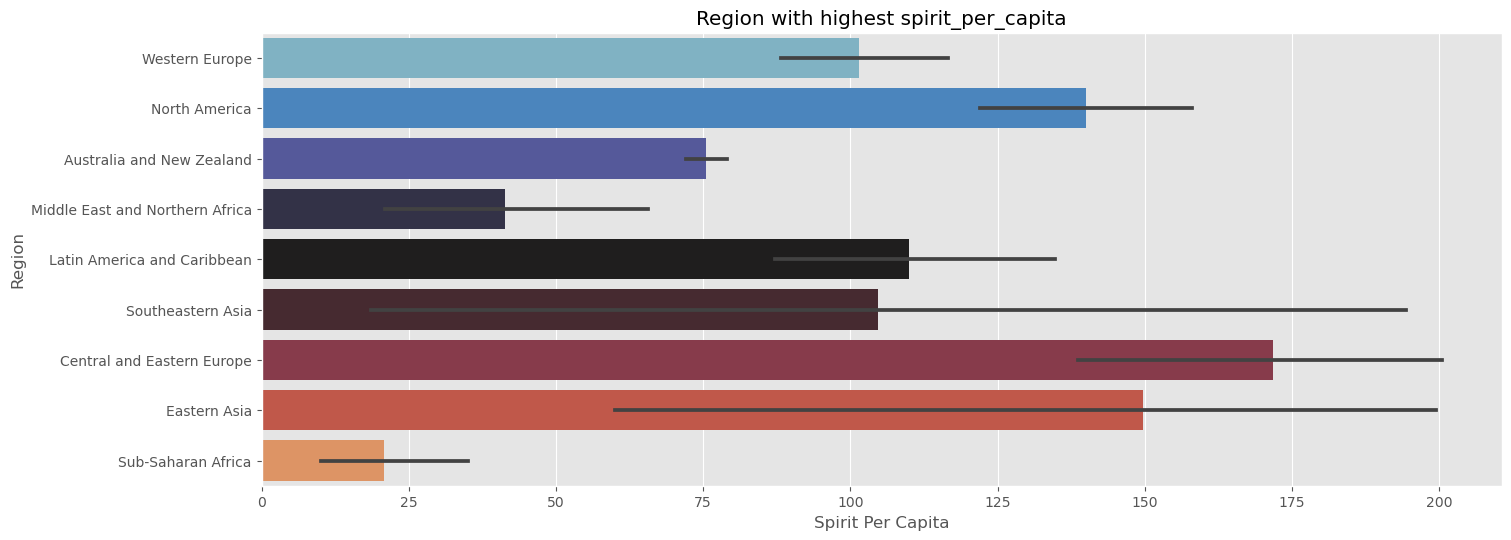

In [236]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'spirit_percapita',
            y = 'region',
            data = df,
            palette = 'icefire')
plt.xlabel('Spirit Per Capita')
plt.ylabel('Region')
plt.title('Region with highest spirit_per_capita')
plt.show()

* Central and Eastern Europe sits at the top with Sub-Saharan Africa at the bottom.

#### 15. Countries with highest Spirit per capita

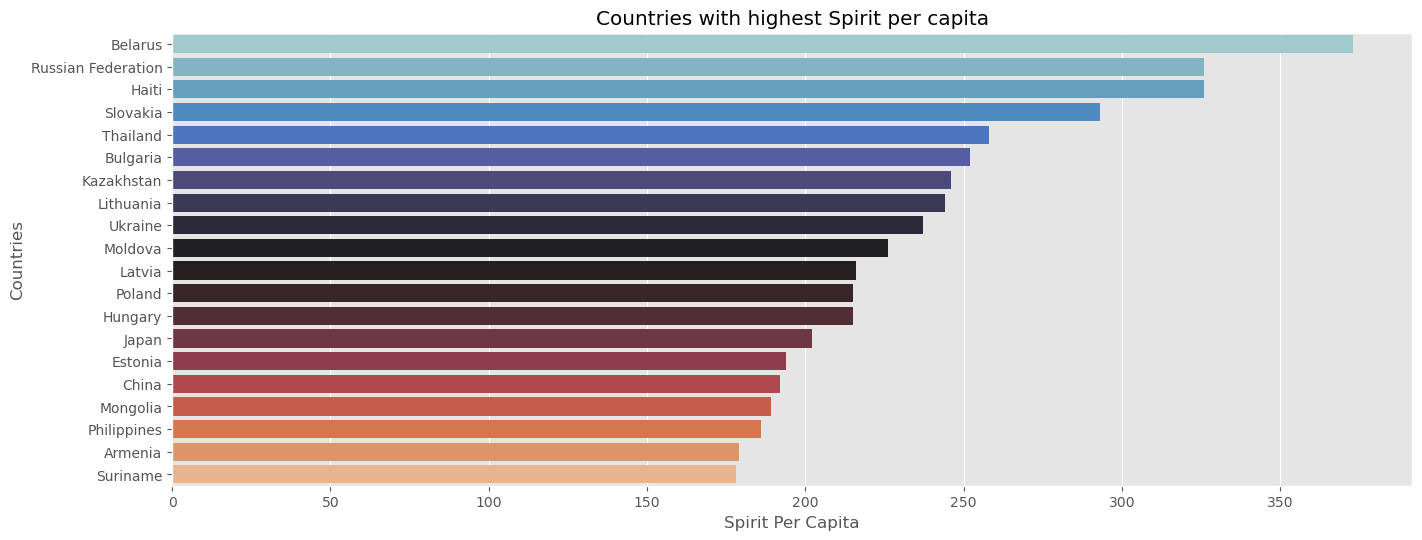

In [241]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'spirit_percapita',
            y = 'country',
            data = df.nlargest(20, 'spirit_percapita'),
            palette = 'icefire')
plt.xlabel('Spirit Per Capita')
plt.ylabel('Countries')
plt.title('Countries with highest Spirit per capita')
plt.show()

* Belarus is way ahead of every other country by a long shot when it comes to Spirit Per Capita. Russia and Haiti have tied for second place. 

#### 16. Countries with lowest Spirit per capita

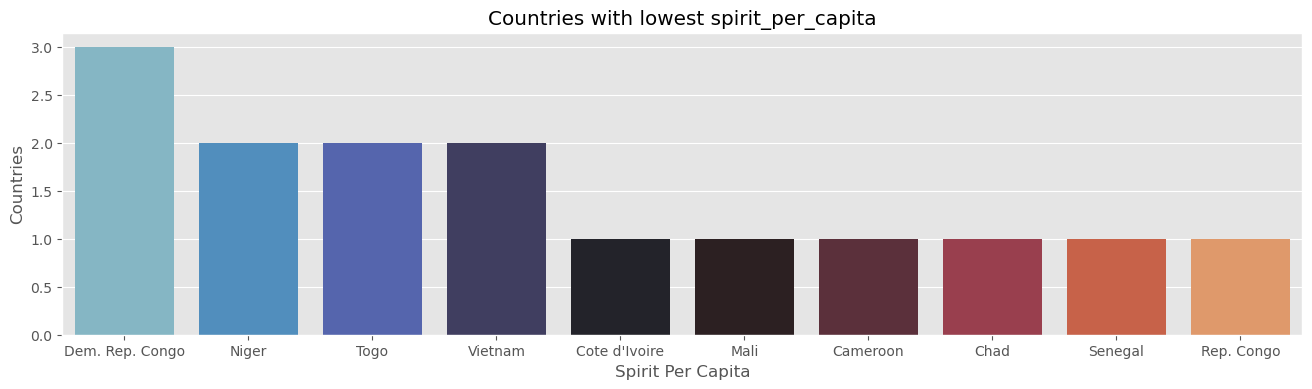

In [244]:
lowest_spirit = df.sort_values(by = ['spirit_percapita'], ascending = False).tail(10)

# plotting
plt.figure(figsize=(16,4), dpi = 100)

sns.barplot(x = 'country',
            y = 'spirit_percapita',
            data = lowest_spirit,
            palette = 'icefire')
plt.xlabel('Spirit Per Capita')
plt.ylabel('Countries')
plt.title('Countries with lowest spirit_per_capita')
plt.show()

* Republic of Congo sits at the bottom. Looking at the bottom 10 countries it seems as if Spirits are not very popular in Sub-Saharan Africa.

#### 17. Wine per capita in different Regions

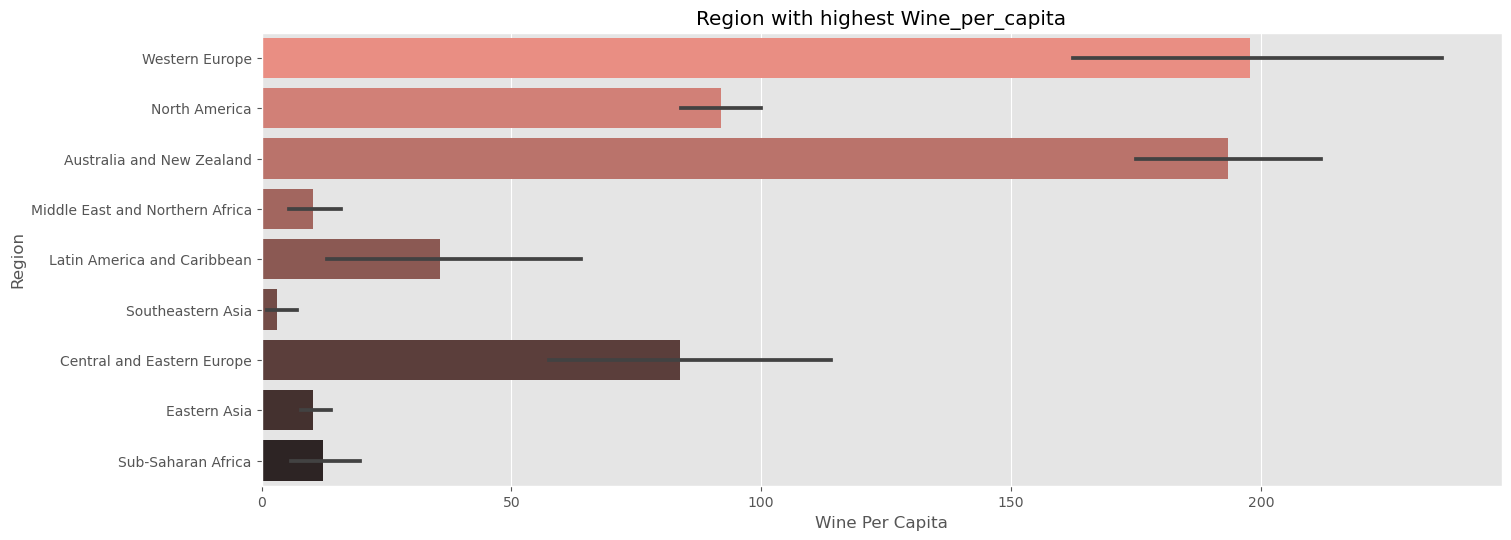

In [248]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'wine_percapita',
            y = 'region',
            data = df,
            palette = 'dark:salmon_r')
plt.xlabel('Wine Per Capita')
plt.ylabel('Region')
plt.title('Region with highest Wine_per_capita')
plt.show()

#### 18. Countries with highest Wine per capita

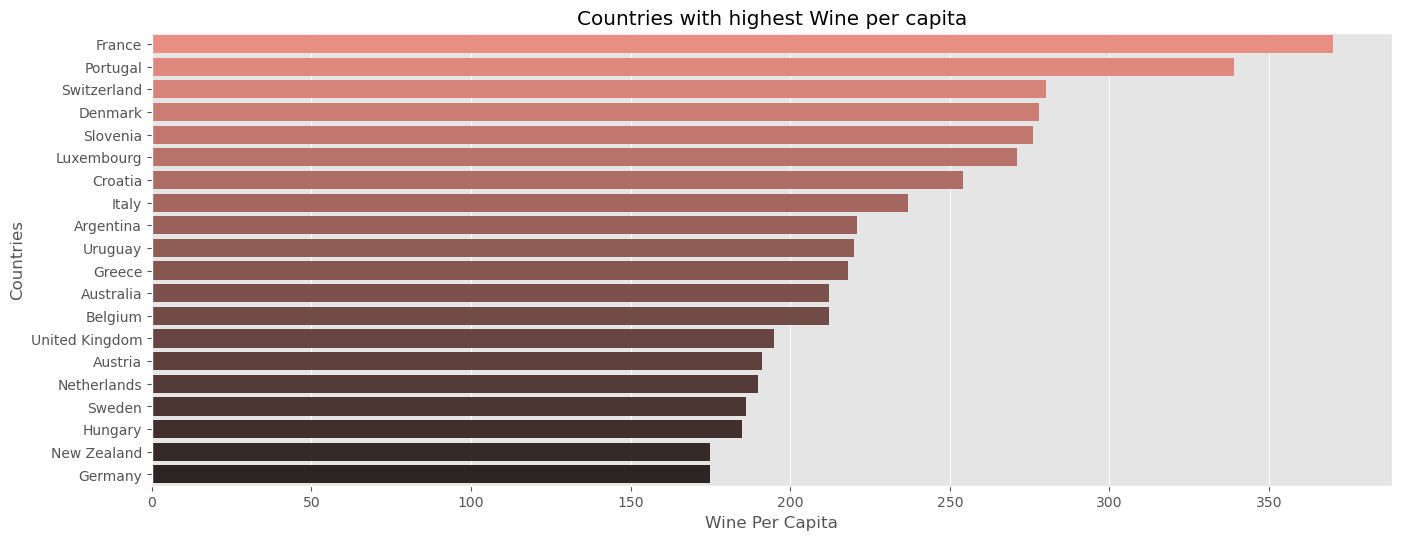

In [249]:
plt.figure(figsize=(16,6), dpi = 100)

sns.barplot(x = 'wine_percapita',
            y = 'country',
            data = df.nlargest(20, 'wine_percapita'),
            palette = 'dark:salmon_r')
plt.xlabel('Wine Per Capita')
plt.ylabel('Countries')
plt.title('Countries with highest Wine per capita')
plt.show()

* Wines in Europe represent all that is traditional in winemaking. In no other place a wine reflects the culture of the people who created it and the flavors of the land in which it grew as it does in Europe.

#### 19. Countries with lowest Wine per capita

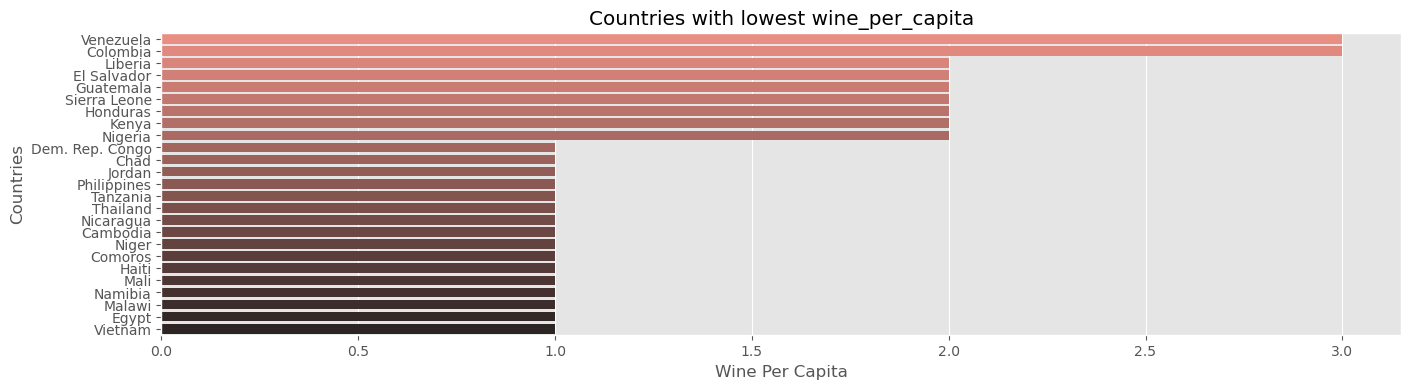

In [256]:
lowest_wine = df.sort_values(by = ['wine_percapita'], ascending = False).tail(25)

# plotting
plt.figure(figsize=(16,4), dpi = 100)

sns.barplot(x = 'wine_percapita',
            y = 'country',
            data = lowest_wine,
            palette = 'dark:salmon_r')
plt.xlabel('Wine Per Capita')
plt.ylabel('Countries')
plt.title('Countries with lowest wine_per_capita')
plt.show()

* The bottom 16 countries have the same level of consumption and are a mix of Asian, Latin American and Carribean, African countries, just as we saw in the Regions graph.

#### 20. At last, lets check the Happiness score of different Countries based on their Beer, Spirit and Wine consumption

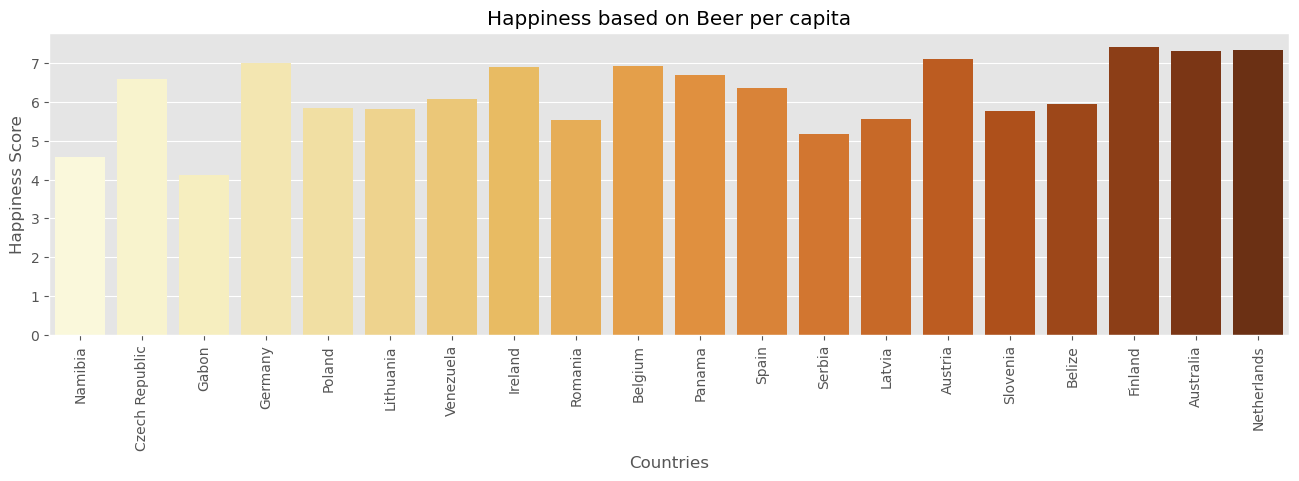

In [237]:
df_beer = df.sort_values(by = 'beer_percapita', ascending = False).head(20)

# plotting
plt.figure(figsize=(16,4), dpi = 100)
sns.barplot(x = 'country',
            y = 'happinessscore',
            data = df_beer,
            palette = 'YlOrBr')
plt.xlabel('Countries')
plt.xticks(rotation = 90)
plt.ylabel('Happiness Score')
plt.title('Happiness based on Beer per capita')
plt.show()

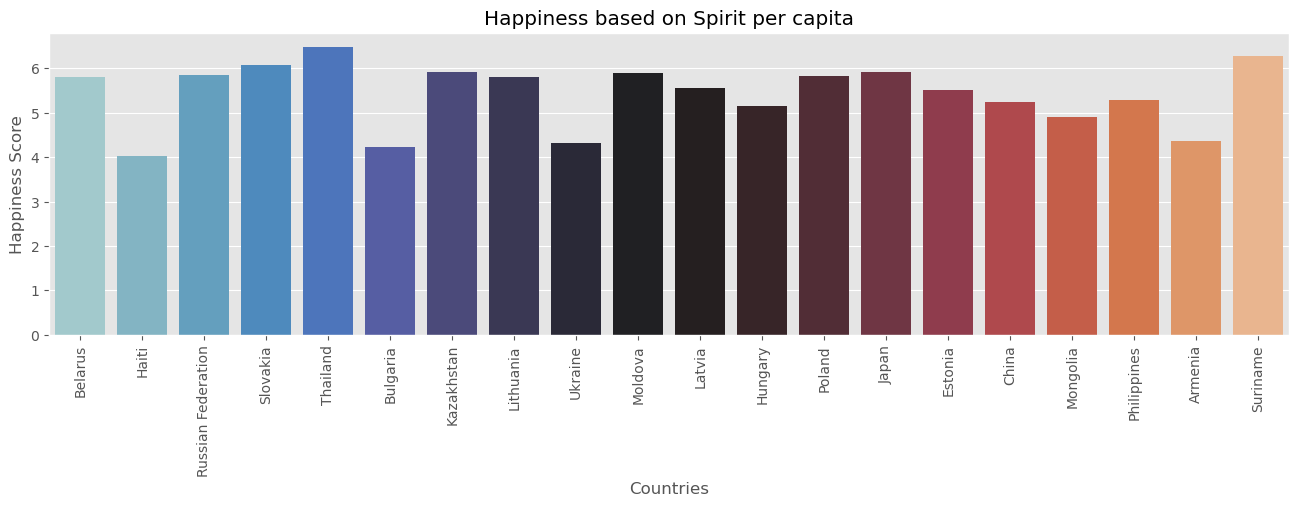

In [245]:
df_spirit = df.sort_values(by = 'spirit_percapita', ascending = False).head(20)

# plotting
plt.figure(figsize=(16,4), dpi = 100)
sns.barplot(x = 'country',
            y = 'happinessscore',
            data = df_spirit,
            palette = 'icefire')
plt.xlabel('Countries')
plt.xticks(rotation = 90)
plt.ylabel('Happiness Score')
plt.title('Happiness based on Spirit per capita')
plt.show()

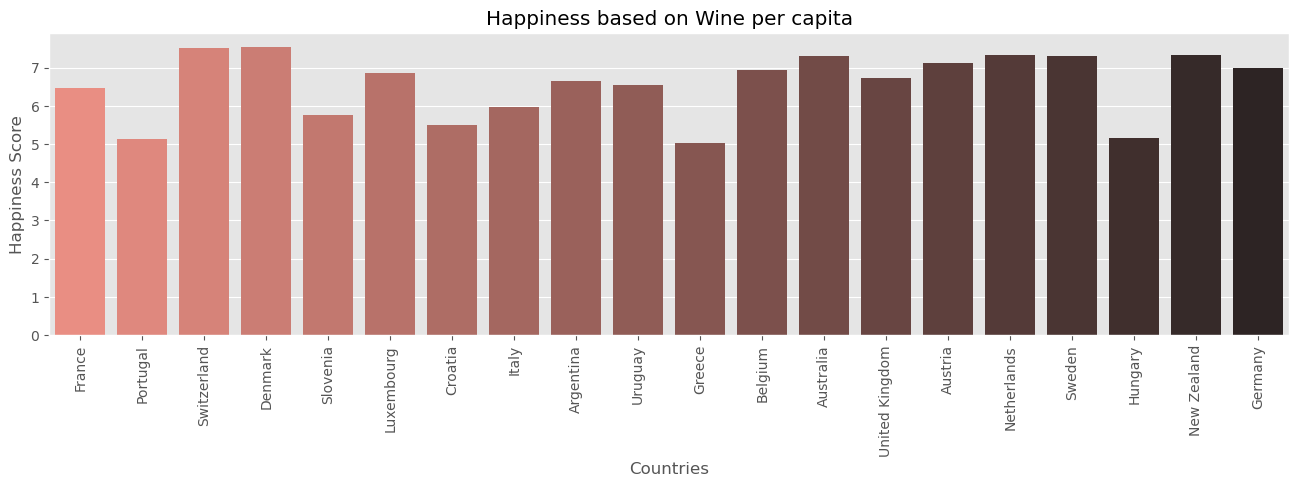

In [247]:
df_wine = df.sort_values(by = 'wine_percapita', ascending = False).head(20)

# plotting
plt.figure(figsize=(16,4), dpi = 100)
sns.barplot(x = 'country',dark:salmon_r
            y = 'happinessscore',
            data = df_wine,
            palette = 'dark:salmon_r')
plt.xlabel('Countries')
plt.xticks(rotation = 90)
plt.ylabel('Happiness Score')
plt.title('Happiness based on Wine per capita')
plt.show()

##### Important :- 
* It can be seen that there is no significant relationship between Happiness and Consumption of Alcohol. Countries with high beer/spirit/wine consumption per capita are not necessarily the happiest countries.

#### [Goto top](#index)